<a href="https://colab.research.google.com/github/amara-deepika/Iris_Classification_EDA/blob/main/BDA_BASICS_IRIS_DATASET_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IRIS DATASET WORKING


The data set contains **3 classes of 50 instances each**, where each class refers to a type of iris plant.
One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Attribute Information:

sepal length in cm
sepal width in cm
petal length in cm
petal width in cm
class:
-- Iris Setosa -
--Iris Versicolour
-- Iris Virginica

In [ ]:
import pandas as pd # TO MAKE STATISTICAL ANALYSIS
import numpy as np # TO MAKE ARRAYS
import os
import matplotlib.pyplot as plt # TO MAKE GRAPHS
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

shuffled_df ->The frac parameter in the sample method specifies the fraction of rows to return in the random sample. In this case, frac=1 means that you want to randomly sample out 100% of the rows from the DataFrame df.



In [ ]:
df = pd.read_csv('Iris.csv') # TO READ THE FILE -CSV
df.head(7) # DEFAULT GIVES FIRST 5 ROWS
#shuffled_df = df.sample(frac=1, random_state=32)
#shuffled_df.head(5)  this is done to get the random rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa


In [ ]:
# delete a column
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


count: The number of non-null values. This helps identify missing values in your dataset.

mean: The mean (average) of the values.

std: The standard deviation, which measures the amount of variation or dispersion of a set of values.

min: The minimum value in the dataset.

25% (Q1): The first quartile or 25th percentile. It is the value below which 25% of the data falls.

50% (Q2): The second quartile or median. It is the value below which 50% of the data falls.

75% (Q3): The third quartile or 75th percentile. It is the value below which 75% of the data falls.

max: The maximum value in the dataset.

In [ ]:
# to display stats about data
df.describe() #describes each column of input attributes

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Column: The names of the columns in the DataFrame.
Non-Null Count: The number of non-null (non-missing) values in each column.
Dtype: The data type of the values in each column.

In [ ]:
# to basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<Axes: xlabel='Species', ylabel='count'>

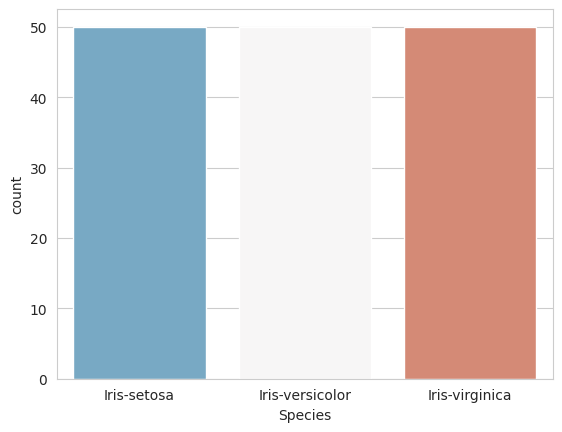

In [ ]:
# to display no. of samples on each class
df['Species'].value_counts() # in numbers
# or -> in graph
#it is always important to have target classes to be of equal size of output
sns.set_style('whitegrid')
sns.countplot(x='Species',data=df,palette='RdBu_r')

data preprocessing
check if there are any null values
Strategy 1: Drop rows with null values (dropna).
Strategy 2: Fill null values with the mean of each column (fillna with mean).
Strategy 3: Forward fill null values (ffill).
Strategy 4: Create a missing value indicator column.(Transparent Representation)

In [ ]:
# check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

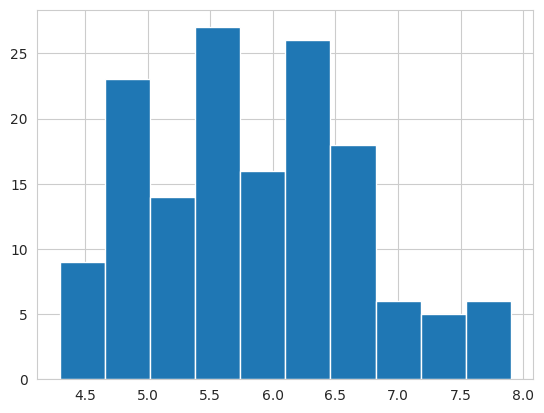

In [ ]:
# histograms
# the bell shape
#also helps to find out the difference of species (classification) from 1 with another
#to check if we have normalized distribution-> learning can be done quickly
df['SepalLengthCm'].hist()

<Axes: >

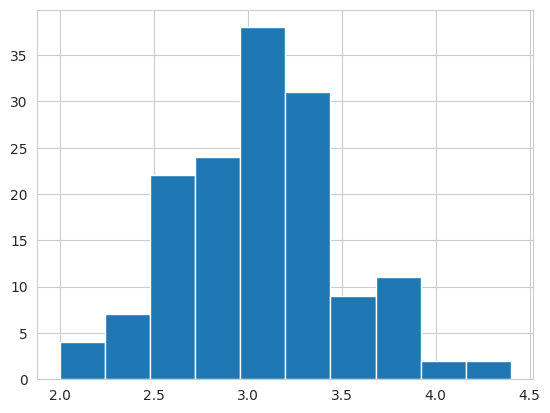

In [ ]:
df['SepalWidthCm'].hist()

<Axes: >

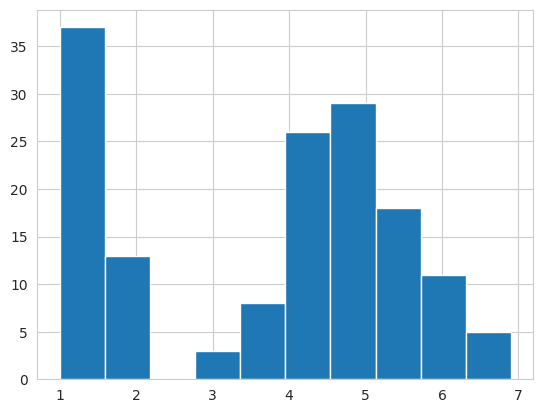

In [ ]:
df['PetalLengthCm'].hist()

<Axes: >

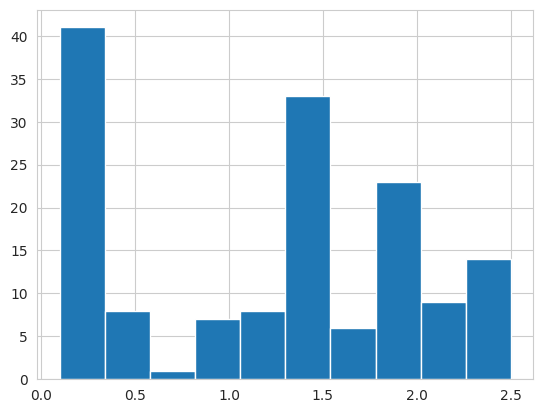

In [ ]:
df['PetalWidthCm'].hist()

In [ ]:
# scatterplot
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

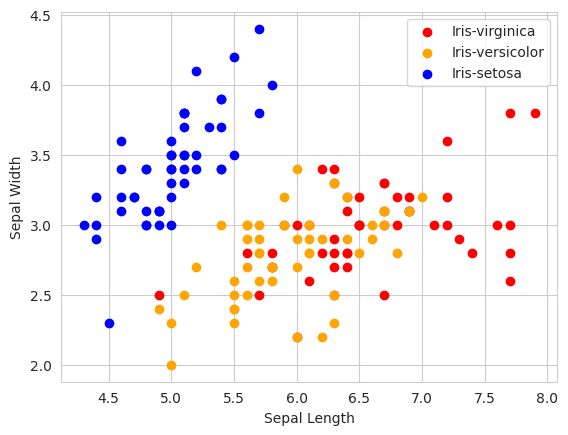

In [ ]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend() #gives the representation of each color->description

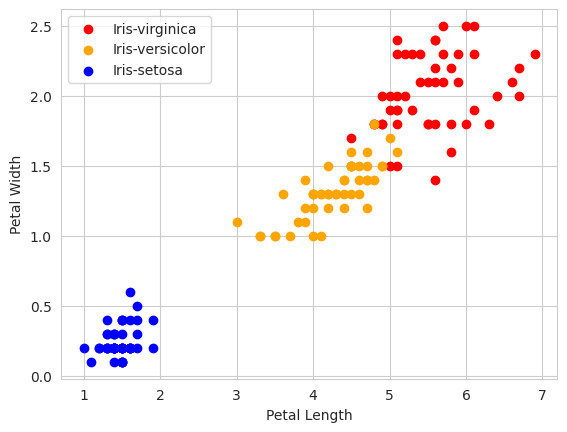

In [ ]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

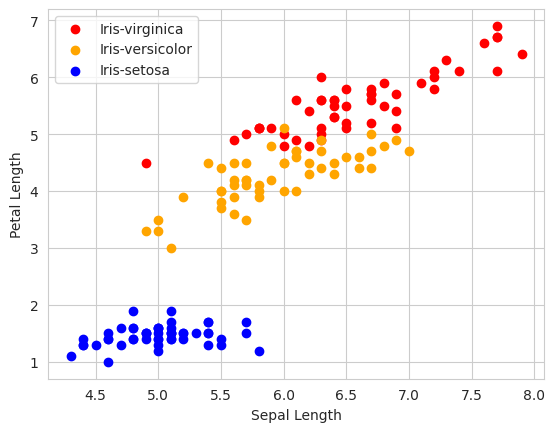

In [ ]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

Coorelation Matrix

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two varibles have high correlation, we can neglect one variable from those two.

In [ ]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

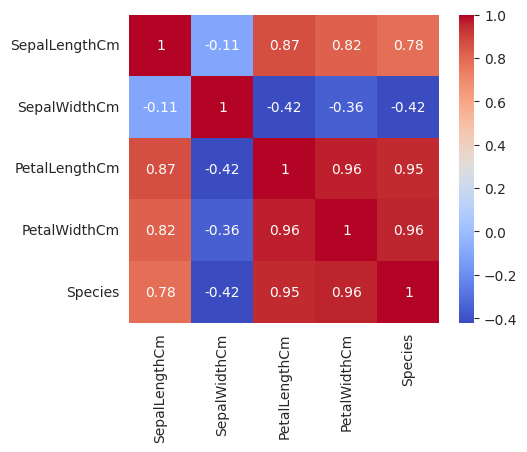

In [ ]:
corr = df.corr()
fig= plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap = 'coolwarm')#annot -> displays the matrix values inside the box

In [ ]:
#to visualize the whole dataset at once
sns.pairplot(df,hue='Species')

NameError: ignored

Label Encoder


In machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form

sklearn -> feature engineering and machine learning models

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
#df.head()
shuffled_df = df.sample(frac=1, random_state=32)
shuffled_df.head(5)  #this is done to get the random rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
55,5.7,2.8,4.5,1.3,1
22,4.6,3.6,1.0,0.2,0
26,5.0,3.4,1.6,0.4,0
56,6.3,3.3,4.7,1.6,1
134,6.1,2.6,5.6,1.4,2


In [ ]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
#X = df.drop(columns=['Species'])#does not make changes to the actual df -> only to X
## or
data=df.values
X=data[:,0:4]#array
Y=data[:,4]

#Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
print(type(Y))

<class 'numpy.ndarray'>


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)
prediction1=model.predict(x_test)
from sklearn.metrics import accuracy_score
print(type(y_test))
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)
for i in range(45):
  print(y_test[i],prediction1[i]) #indexing works for arrays and not for series

<class 'numpy.ndarray'>
Accuracy:  100.0
1.0 1.0
1.0 1.0
2.0 2.0
1.0 1.0
2.0 2.0
0.0 0.0
0.0 0.0
0.0 0.0
2.0 2.0
0.0 0.0
0.0 0.0
2.0 2.0
2.0 2.0
2.0 2.0
0.0 0.0
1.0 1.0
1.0 1.0
0.0 0.0
2.0 2.0
1.0 1.0
1.0 1.0
2.0 2.0
2.0 2.0
0.0 0.0
2.0 2.0
1.0 1.0
0.0 0.0
0.0 0.0
1.0 1.0
0.0 0.0
2.0 2.0
1.0 1.0
2.0 2.0
1.0 1.0
2.0 2.0
2.0 2.0
0.0 0.0
0.0 0.0
2.0 2.0
2.0 2.0
0.0 0.0
1.0 1.0
0.0 0.0
1.0 1.0
0.0 0.0


In [ ]:
x_new=np.array([[3,2,1,0.2],[4.9,2.2,3.8,1.1]])
predict=model.predict(x_new)
print(predict)
output={0:"Iris-virginica",1:"Iris-versicolor",2:"Iris-setosa"}
for i in predict:
  print(output[i])

[0. 1.]
Iris-virginica
Iris-versicolor
